# Projeto de Estatística II


## Parte I - Regressão Linear

-------------------------------

**Instruções:**

- A primeira parte do projeto engloba a avliação dos tópicos de regressão linear.
- Ela deve ser entregue até o dia 26/04/2022.
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteI.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

O dataset 'cancer_EUA.csv' relaciona a taxa de mortalidade por câncer em alguns condados dos EUA e outras features destes condados.

Dicionário dos dados:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

* avgAnnCount: Mean number of reported cases of cancer diagnosed annually

* avgDeathsPerYear: Mean number of reported mortalities due to cancer

* incidenceRate: Mean per capita (100,000) cancer diagoses

* medianIncome: Median income per county

* popEst2015: Population of county

* povertyPercent: Percent of populace in poverty

* studyPerCap: Per capita number of cancer-related clinical trials per county

* binnedInc: Median income per capita binned by decile

* MedianAge: Median age of county residents

* MedianAgeMale: Median age of male county residents

* MedianAgeFemale: Median age of female county residents

* Geography: County name

* AvgHouseholdSize: Mean household size of county

* PercentMarried: Percent of county residents who are married

* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

* PctEmployed16_Over: Percent of county residents ages 16 and over employed

* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

* PctPrivateCoverage: Percent of county residents with private health coverage

* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

* PctPublicCoverage: Percent of county residents with government-provided health coverage

* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

* PctWhite: Percent of county residents who identify as White

* PctBlack: Percent of county residents who identify as Black

* PctAsian: Percent of county residents who identify as Asian

* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

* PctMarriedHouseholds: Percent of married households

* BirthRate: Number of live births relative to number of women in county

O objetivo da primeira parte do projeto é criar um modelo linear para prever o target (TARGET_deathRate). Para isso, siga o passo a passo abaixo e apresente seus raciocínios e resultados. 

1. Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.) 

## povertyPercent: Percent of populace in poverty

Acredito que essa feature é a mais correlacionada com o target pois se trata
da população com menores recursos para ter uma vida saudável e tratar doenças.

2. Agora, realize um EDA na base de dados para entender mais sobre as features. Quais são suas conclusões?

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('cancer_EUA.csv', sep=';', decimal=',')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,890.770529,164.9,489.8,61898.0,260131.0,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,669.088363,161.3,411.6,48127.0,43269.0,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,744.083462,174.7,349.7,49348.0,21026.0,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,953.773339,194.8,430.4,44243.0,75882.0,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,646.194438,144.4,350.1,49955.0,10321.0,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
# Todos os dados são numéricos

3. Como o target está distribuído? Quais são as seus valores de média, mediana e variância? A distribuição é assimétrica?

In [46]:
df['TARGET_deathRate'].describe()

count    3047.000000
mean      178.491008
std        27.629797
min        56.000000
25%       161.200000
50%       178.100000
75%       195.200000
max       293.900000
Name: TARGET_deathRate, dtype: float64

In [69]:
# Mediana
np.median(df['TARGET_deathRate'])

178.1

In [70]:
# Variância 
np.var(df['TARGET_deathRate'])

763.1551209736858

In [47]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,843.919853,178.491008,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,143.907390,27.629797,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,294.277385,56.000000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,746.660187,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,842.516774,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,939.423171,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,1553.351487,293.900000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


3. Pensando em um modelo de Regressão Linear Simples escolha uma feature para ser a variável independente, mas procure escolher uma que faça sentido com o modelo linear. 

In [60]:
# Dê uma olhada na correlação entre as variáveis

correlacao = df.corr(method='spearman')['TARGET_deathRate'].sort_values(ascending=False)

In [61]:
correlacao

TARGET_deathRate           1.000000
avgDeathsPerYear           0.672511
PctPublicCoverageAlone     0.453102
povertyPercent             0.442435
PctHS25_Over               0.420579
incidenceRate              0.407906
PctUnemployed16_Over       0.402940
PctPublicCoverage          0.402365
PctHS18_24                 0.275896
PctBlack                   0.251542
PctNoHS18_24               0.124543
MedianAgeFemale            0.019903
AvgHouseholdSize           0.013300
MedianAge                  0.008589
MedianAgeMale             -0.004532
popEst2015                -0.044447
BirthRate                 -0.050487
avgAnnCount               -0.085583
PctWhite                  -0.101955
studyPerCap               -0.112687
PctAsian                  -0.207830
PctSomeCol18_24           -0.212383
PctOtherRace              -0.216924
PercentMarried            -0.257257
PctBachDeg18_24           -0.270316
PctEmpPrivCoverage        -0.277938
PctMarriedHouseholds      -0.279620
PctPrivateCoverageAlone   -0

    3.1. Como é a distribuição da feature escolhida? Ela possui outliers? Precisa de alguma limpeza nos dados?

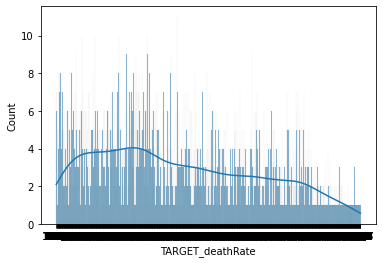

In [9]:
# Distribuição não é assimétrica

sns.histplot(data=df, x="TARGET_deathRate", kde=True);

In [63]:
#Skewness

df["TARGET_deathRate"].skew()

0.12931340277335948

    3.2. Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.

    3.3 Utilizando as métricas de avaliação verifique o resultado do modelo para o conjunto de dados de teste.

4. Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?

5. Compare os três modelos desenvolvidos.